- Rachel Chang
- DSC 680
- Weeks 09-11
- Project 03

# Laptop Price Estimation
	
   The goal of this project is to determine appropriate pricing of a laptop based on various features. As a technology retail-based company like Best Buy, Amazon vendor, etc. it is imperative that laptops are appropriately priced based on features to get the most bang for your buck.
    
Data Resource: https://www.kaggle.com/datasets/alhamdulliah123/laptop-price-estimation-using-feature-scaling


In [1]:
import pandas as pd

file_path = 'laptop_price_predictor_FINAL.csv' 
laptop_df = pd.read_csv(file_path) 

In [2]:
print(laptop_df.head()) 

  Company                               Product  \
0      HP      Victus 15-fb0157AX Gaming Laptop   
1      HP                   15s-fq5007TU Laptop   
2    Acer                  One 14 Z8-415 Laptop   
3  Lenovo  Yoga Slim 6 14IAP8 82WU0095IN Laptop   
4   Apple       MacBook Air 2020 MGND3HN Laptop   

                              Cpu  Ram                           Gpu  \
0           Hexa Core, 12 Threads    8       4GB AMD Radeon RX 6500M   
1  Hexa Core (2P + 4E), 8 Threads    8            Intel UHD Graphics   
2            Dual Core, 4 Threads    8        Intel Iris Xe Graphics   
3  12 Cores (4P + 8E), 16 Threads   16      Intel Integrated Iris Xe   
4             Octa Core (4P + 4E)    8  Apple M1 Integrated Graphics   

           OpSys  Inches  Price   Cpu_brand Gpu_brand  HDD  SSD   LogPrice  
0  Windows 11 OS    15.6  49900  Hexa Core,       4GB    0  512  10.817776  
1  Windows 11 OS    15.6  39900   Hexa Core     Intel    0  512  10.594132  
2  Windows 11 OS    14.0  269

## Linear Regression model

In [ ]:
# Define the columns to exclude
columns_to_exclude = ['Price', 'LogPrice']

# Create a new DataFrame without the excluded columns
df_subset = laptop_df.drop(columns=columns_to_exclude, axis=1)

In [ ]:
#encoding and cleaning the data 

df_subset

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Provide Data
# Input data (x) must be a 2D array, so we use .reshape((-1, 1))

x = df_subset
# Output data (y) can be a 1D array
y = laptop_df['Price']

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify your categorical columns
categorical_features = ['Company', 'Product', 'Cpu', 'Gpu', 'OpSys', 'Cpu_brand', 'Gpu_brand']

# Create a transformer that encodes specific columns and leaves the rest alone
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the transformation to your feature set
x_encoded = preprocessor.fit_transform(x)


# Create an instance of the LinearRegression class
model = LinearRegression()

model.fit(x_encoded, y)


# 3. Get results (optional)
# Obtain the coefficient of determination (R-squared score)
r_sq = model.score(x_encoded, y)
print(f"Coefficient of determination (R-squared): {r_sq}")

# Print the intercept (b0) and coefficients (b1)
print(f"Intercept (b0): {model.intercept_}")
print(f"Slope (b1): {model.coef_}")




Coefficient of determination (R-squared): 0.999409505758735
Intercept (b0): 105802.47309476425
Slope (b1): [-9498.40683547 41994.71996663   203.89873265 ... -1626.91733597
     0.            45.31768014]


In [41]:
# 4. Predict response
# Use the model to make predictions on new or existing data
y_pred = model.predict(x_encoded)
print(f"Predicted response for original x values:\\n{y_pred}")


Predicted response for original x values:\n[ 50094.16941265  39859.02178061  27108.2822457   59741.35145051
  70059.25009914  40002.88773843  36773.85449738  76999.16554156
  49081.57700103  78391.45960163  50038.35543505  10947.98674595
  73035.54978994  11100.920717    30022.76746205  53658.94080755
  34182.10328906  79898.97537643  69005.32100814  46003.14509467
  49811.83774178 104763.60644815  54978.2877408   49539.66090869
  55841.10419835  43880.70517816  19643.70253386  28882.82363072
  54997.56383574  71036.32959515  56933.2735026  179966.64168518
  53931.14078622  37919.41306339  96934.98687944  71909.11197673
  59919.38648261  62518.88364934  30904.4579597   74975.76552103
  36627.52471215  78071.47941757  55068.70734846  37564.68078657
  89948.54944659 399924.54322925  31848.48087718  32732.51858073
  70605.17326422 105022.1185195   23938.732134    37983.1847521
  52800.72538035  30881.68814204  58963.13878168  35001.90758495
  51948.5761766   51765.14459218  69124.50913963

In [53]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# 1. R-squared (0 to 1) - Higher is better
# Tells you what percentage of the variation is explained by the model
r2 = r2_score(y, y_pred)

# 2. Mean Absolute Error (MAE) - Lower is better
# The average "off" amount in the same units as your target (y)
mae = mean_absolute_error(y, y_pred)

# 3. Root Mean Squared Error (RMSE) - Lower is better
# Similar to MAE but punishes larger errors more heavily
rmse = root_mean_squared_error(y, y_pred)

print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


R2 Score: 0.9994
MAE: 467.93
RMSE: 1478.56


It appears to memorizing rather than predicting need to further fine tune to fix this issue

## Splitting out the train versus test data to find the r2 score

In [42]:
from sklearn.model_selection import train_test_split

# 1. Split data (80% for training, 20% for testing)
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

# 2. Train the model ONLY on the training set
model.fit(x_train, y_train)

# 3. Predict the values for the "unseen" test set
y_test_pred = model.predict(x_test)

# 4. Check the score on the unseen data
from sklearn.metrics import r2_score
print(f"Unseen Data R2 Score: {r2_score(y_test, y_test_pred):.4f}")


Unseen Data R2 Score: 0.8319


Text(0.5, 1.0, 'Test Set Performance')

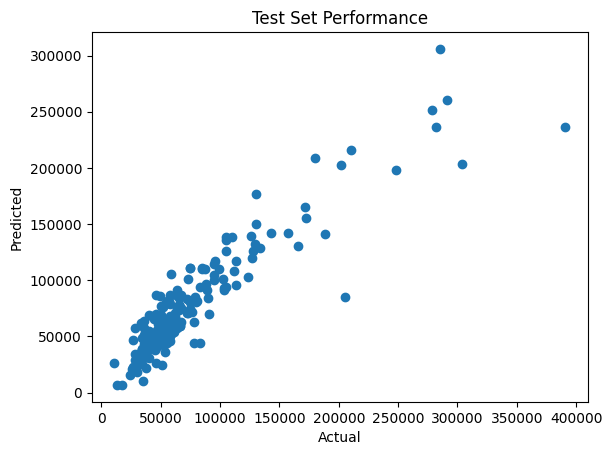

In [43]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Set Performance")


# Working to further fine tune to a more stable model

                                                Feature    Coefficient  \
543    cat__Product_Spectre 17-cs0097nr Foldable Laptop  312296.391968   
170                    cat__Product_Dragonfly G4 Laptop  143824.005077   
603   cat__Product_ThinkPad X1 Carbon 21HMS00000 Laptop  122895.018126   
387        cat__Product_Legion 5 Pro 2023 Gaming Laptop -108262.430703   
96    cat__Product_Alienware x15 R2 D569947WIN9 Gami...   97424.024052   
386                   cat__Product_Latitude 9430 Laptop   92892.812032   
510   cat__Product_Predator Triton 500 SE PT516-52s ...  -76189.074659   
836          cat__Product_Zerobook 13 ZL513 2023 Laptop  -72897.564282   
601               cat__Product_ThinkPad T14 2022 Laptop   72843.326281   
1035                                cat__Gpu_brand_16GB   69419.990670   

      Abs_Coefficient  
543     312296.391968  
170     143824.005077  
603     122895.018126  
387     108262.430703  
96       97424.024052  
386      92892.812032  
510      76189.07

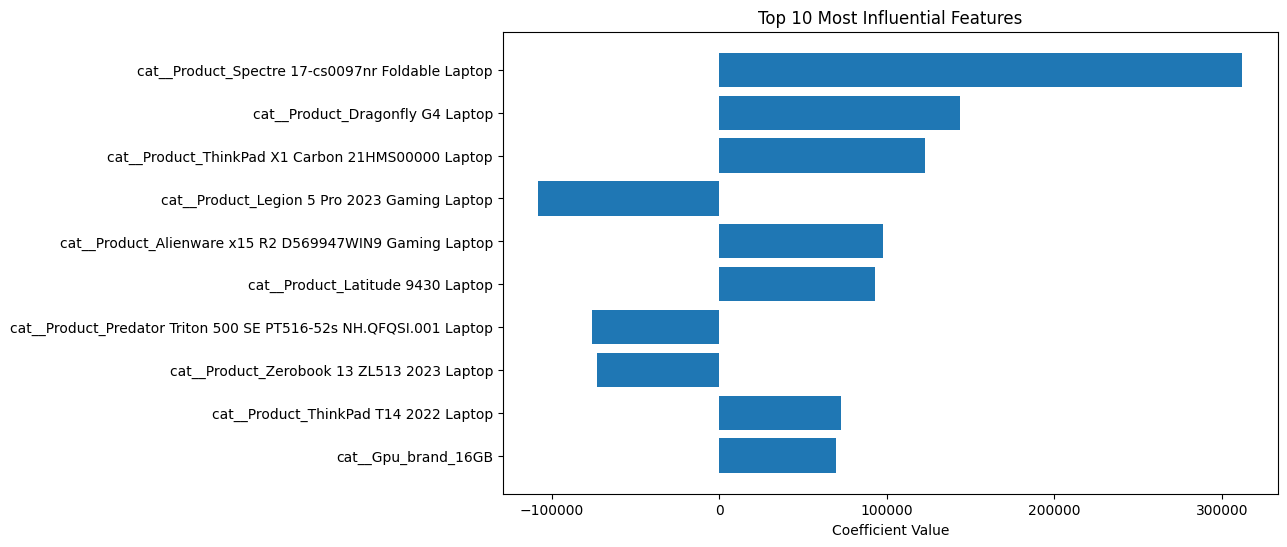

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Get the feature names from your transformer/preprocessor
feature_names = preprocessor.get_feature_names_out()

# 2. Now create the importance DataFrame
importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})

# 3. Sort and visualize as before
importance['Abs_Coefficient'] = importance['Coefficient'].abs()
importance = importance.sort_values(by='Abs_Coefficient', ascending=False)
print(importance.head(10))

# Visualize the top 10
plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'].head(10), importance['Coefficient'].head(10))
plt.xlabel('Coefficient Value')
plt.title('Top 10 Most Influential Features')
plt.gca().invert_yaxis()
plt.show()


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# 1. Scale your numeric features
scaler = StandardScaler(with_mean=False) # with_mean=False is better for sparse matrices
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 2. Re-run Lasso on the scaled data
# We also increase max_iter to give the math more time to finish
lasso_model = Lasso(alpha=1.0, max_iter=10000) 
lasso_model.fit(x_train_scaled, y_train)

print(f"Scaled Lasso Test R2: {lasso_model.score(x_test_scaled, y_test):.4f}")


Scaled Lasso Test R2: 0.7289


In [46]:
import numpy as np
n_kept = np.sum(lasso_model.coef_ != 0)
print(f"Lasso kept {n_kept} out of {x_train.shape[1]} features.")


Lasso kept 776 out of 1056 features.


Decided to try to use Ridge regression for fine tuning the columns of the model to get a better R2 score to have more of a sweet spot between the 72 and the 83 score. Ended up working better for a more stable model, lasso regression was a bit too aggressive.

 Ridge Regression is often the "sweet spot" for performance because it shrinks unimportant coefficients without completely deleting them like Lasso does

In [21]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_scaled, y_train)
print(f"Ridge R2 Score: {ridge_model.score(x_test_scaled, y_test):.4f}")


Ridge R2 Score: 0.7605


In [47]:
import pandas as pd

# 1. Map coefficients to feature names
importance = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Weight': ridge_model.coef_
})

# 2. Sort to see the "Heaviest Hitters"
importance['Abs_Weight'] = importance['Weight'].abs()
importance = importance.sort_values(by='Abs_Weight', ascending=False)

print("Top 10 Most Predictive Features:")
print(importance[['Feature', 'Weight']].head(10))


Top 10 Most Predictive Features:
                                                Feature        Weight
543    cat__Product_Spectre 17-cs0097nr Foldable Laptop  11848.564583
1052                                     remainder__Ram   9337.128104
1055                                     remainder__SSD   7687.533823
170                    cat__Product_Dragonfly G4 Laptop   5685.823484
1024                            cat__Cpu_brand_24 Cores   5381.389406
96    cat__Product_Alienware x15 R2 D569947WIN9 Gami...   5073.452189
1035                                cat__Gpu_brand_16GB   5038.799696
856            cat__Cpu_24 Cores (8P + 16E), 32 Threads   4963.868053
386                   cat__Product_Latitude 9430 Laptop   4916.131106
603   cat__Product_ThinkPad X1 Carbon 21HMS00000 Laptop   4813.733321


### Scoreing of the ridge model

In [48]:
from sklearn.metrics import mean_absolute_error, r2_score

# Get predictions on the test set
y_ridge_pred = ridge_model.predict(x_test_scaled)

# Calculate the stats
mae = mean_absolute_error(y_test, y_ridge_pred)
r2 = r2_score(y_test, y_ridge_pred)

print(f"Ridge R2 Score: {r2:.4f}")
print(f"Average Error (MAE): {mae:.2f}")


Ridge R2 Score: 0.7605
Average Error (MAE): 16589.78


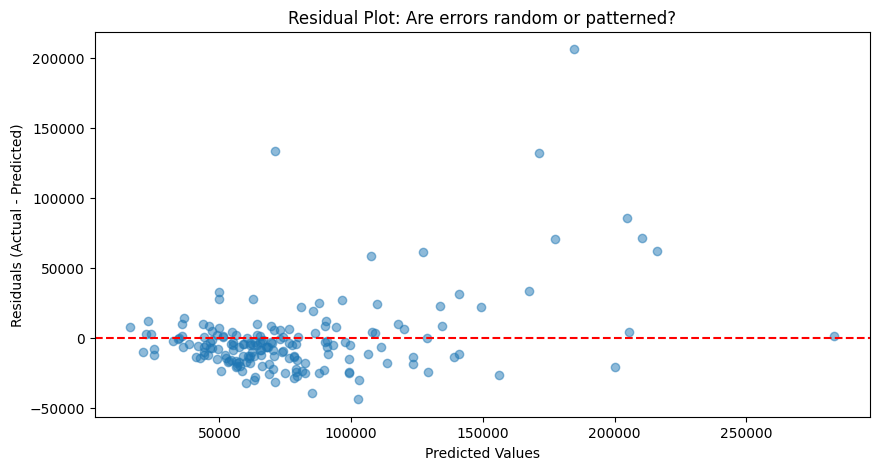

In [49]:
import matplotlib.pyplot as plt

residuals = y_test - y_ridge_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_ridge_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot: Are errors random or patterned?')
plt.show()


# XGBoost

### Why XGBoost might beat Ridge
*   **Non-Linearity:** If your data has "if-this-then-that" relationships (e.g., *if* brand is HP *and* year > 2022, price jumps significantly), trees find those much better than linear lines.
*   **Automatic Selection:** XGBoost is naturally good at ignoring useless features, so you might not need to manually drop as many columns as you did for the linear model.

**How does the XGBoost R2 score compare to your Ridge score of 0.83?** If it's higher, you might want to try **Hyperparameter Tuning** to push it even further.


In [50]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Initialize the model
# n_estimators: Number of trees to build
# learning_rate: How much each tree contributes (smaller is often better/slower)
xgb_model = xgb.XGBRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)

# 2. Fit the model (You can use the non-scaled x_train here)
xgb_model.fit(x_train, y_train)

# 3. Predict and Score
y_xgb_pred = xgb_model.predict(x_test)

print(f"XGBoost R2 Score: {r2_score(y_test, y_xgb_pred):.4f}")
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_xgb_pred):.2f}")


XGBoost R2 Score: 0.8047
XGBoost MAE: 15219.94


### 3. Check XGBoost Feature Importance
XGBoost has its own built-in way to show which features were most useful for splitting the trees.


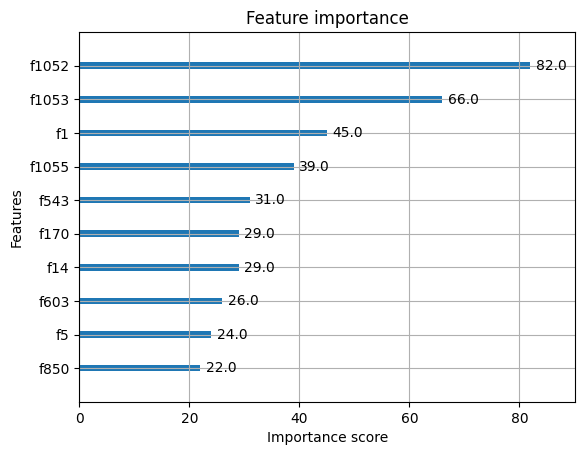

In [51]:
import matplotlib.pyplot as plt

# Use XGBoost's built-in plotting tool
xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()

### trying to hyperparameter fine tune even further

In [29]:
import xgboost as xgb

# Increase n_estimators (more trees) and decrease learning_rate (finer adjustments)
xgb_tuned = xgb.XGBRegressor(
    n_estimators=500,     # More trees to learn complex patterns
    learning_rate=0.05,   # Slow down the learning to avoid overfitting
    max_depth=6,          # Allow trees to be slightly deeper/more complex
    subsample=0.8,        # Use 80% of data per tree to add variety
    random_state=42
)

xgb_tuned.fit(x_train, y_train)
y_tuned_pred = xgb_tuned.predict(x_test)

print(f"Tuned XGBoost R2: {r2_score(y_test, y_tuned_pred):.4f}")


Tuned XGBoost R2: 0.8440


In [31]:
# Assuming importance_df was created in the last step
print("The 'Big Five' Drivers of your 0.84 Score:")
print(importance_df.head(5))


The 'Big Five' Drivers of your 0.84 Score:
                      Feature  Importance
1024  cat__Cpu_brand_24 Cores    0.100080
1052           remainder__Ram    0.089938
1055           remainder__SSD    0.058675
1019  cat__Cpu_brand_14 Cores    0.045317
1035      cat__Gpu_brand_16GB    0.024959


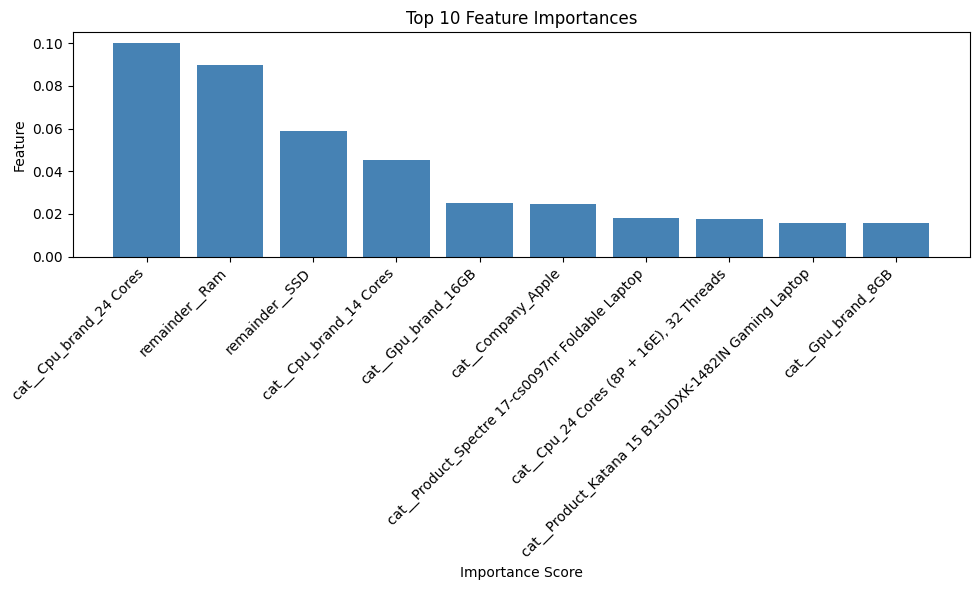

In [55]:
# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Select, for example, the top 10 features to display
top_features = importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Importance'], color='steelblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.xticks(rotation=45, ha='right') # Rotate feature names for readability
plt.tight_layout()
plt.show()


# Dummy prediction on fine tuned XGBoost model

In [37]:
print(f"Preprocessor expects: {preprocessor.n_features_in_} columns")


Preprocessor expects: 11 columns


In [38]:
import pandas as pd

# 1. Create a dictionary with your new data point (must match original column names)
new_data = {
    'Company': 'HP',                             
    'Product': 'Victus 15-fb0157AX Gaming Laptop',
    'Cpu': 'Hexa Core, 12 Threads',
    'Ram': '8',
    'Gpu': '4GB AMD Radeon RX 6500M',
    'OpSys': 'Windows 11 OS',  
    'Inches': [15.6],  
    'Cpu_brand': 'Hexa Core',
    'Gpu_brand': '4GB',  
    'HDD': [0],  
    'SSD': [512]    
}
new_df = pd.DataFrame(new_data)

# 2. Run it through the SAME preprocessor you used for training
# This handles the One-Hot Encoding and scaling automatically
new_x_encoded = preprocessor.transform(new_df)

# 3. Predict!
prediction = xgb_tuned.predict(new_x_encoded)
print(f"Predicted Value: {prediction[0]:.2f}")


Predicted Value: 54203.98
